# Wstęp do Sztucznej Inteligencji - rok akademicki 2023/2024

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Optymalizacja globalna: Problem plecakowy - Zadania
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.


## Problem plecakowy
Problem plecakowy to problem optymalizacji dyskretnej. W swojej najprostszej wersji może być sformułowany następująco.

Spośród `N` dostępnych przedmiotów możmy zabrać taką ich liczbę by suma ich wag nie przekraczała pewnej dopuszczalnej wartości (maksymalne obciążenie plecaka). Każdy przedmiot, oprócz wagi, ma przypisaną swoją wartość.

Które przedmioty zabrać, aby ich sumaryczna wartość była jak największa, ale ich sumaryczna waga nie przekraczała dopuszczalnej maksymalnej wagi plecaka?

Mamy zatem do czynienia z problemem optymalizacji z ograniczeniami.

Przeczytaj więcej o problemie plecakowym: https://pl.wikipedia.org/wiki/Problem_plecakowy

## Prosty generator problemu plecakowego (0-1 knapsack problem)

Generujemy listę przedmiotów, z losowymi wagami oraz wartościami z podanych przedziałów.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

#wmin - minimalna waga przedmiotu
#wmax - maksymalna waga przedmiotu
#vmin - minimalna wartość przedmiotu
#vmax - maksymalna wartość przedmiotu
#items_num - liczba dostępnych przedmiotów
def generate_problem(wmin, wmax, vmin, vmax, items_num):
    w = np.random.randint(wmin, wmax, size=items_num)  #weight
    v = np.random.randint(vmin, vmax, size=items_num)  #values
    return w, v

Przykładowy problem plecakowy (zwróć uwagę, że możemy zagwarantować generowanie za każdym razem tego samego problemu poprzez ustawienie ziarna generatora liczb losowych).

In [5]:
num = 50  # liczba przedmiotów
wmin = 1  # minimlana waga
wmax = 100  # maksymalna waga
vmin = 1  # minimalna wartosc
vmax = 100  # maksymalna wartosc
knapsack_perc = 0.5  # pojemnosc plecaka jako procent sumy wag wszystkich przedmiotow

# ustawienie ziarna
np.random.seed(1111)

w, v = generate_problem(wmin, wmax, vmin, vmax, num)  # w - wagi, v - wartosci
Wall = w.sum()
Vall = v.sum()
W = int(knapsack_perc * Wall) # pojemnosc plecaka

print('Problem plecakowy:')
print('pojemnosc plecaka:', W)
print('wagi:',w, 'suma:', Wall)
print('wartosci:',v, 'suma:', Vall)

Problem plecakowy:
pojemnosc plecaka: 1140
wagi: [29 56 82 13 35 53 25 23 21 12 15  9 13 87  9 63 62 52 43 77 95 79 77  5
 78 41 10 10 88 19  1 37  9 70 22 82 46 51 97 46 12 32 56 30 86 45 99 89
  1 88] suma: 2280
wartosci: [94 48 26 65 53 54 76 48 98 63 67 74 40 41 76  8 10 78 18 79 92 23  3 64
 22 43 24 75  8 36 78  6 98 33 49 31 15 21 30 44 14 75 55 22 71 95 94  9
 68 65] suma: 2479


## Zadanie 1
 - rozwiązanie metodą brute force

Mamy problem plecakowy ze 100 przedmiotami. Chcemy sprawdzić każde możliwe rozwiązanie. Jeśli w ciągu sekundy moglibyśmy sprawdzić miliard rozwiązań, to ile lat by to trwało? Przyjmij, że rok ma 365 dni.

Otrzymaną liczbę lat przypisz do zmiennej o nazwie `liczba_lat`. Wynik zaokrąglij do pełnych lat w dół.

In [2]:
liczba_lat = 50
print('Zajmie to: {} lat'.format(liczba_lat))

Zajmie to: 50 lat


## Kodowanie rozwiązania

Potencjalne rozwiązanie problemu plecakowego można zakodować jako wektor `0`/`1`, gdzie `1` oznacza wybranie przedmiotu do plecaka.

Warto skorzystać z kodowania `True`/`False` i tablic `numpy`, gdyż ułatwi to obliczenia (macierze True/False mogą służyć do indeksowania innych macierzy).

Przykładowo:

In [6]:
num = w.shape[0]
sol = np.random.randint(0, 2, size=num, dtype=bool)  # True oznacza, ze przedmiot jest wybrany

print('Rozwiązanie:', sol)
print('Lista wybranych przedmiotow:', np.arange(num)[sol])
print('Suma wag:', w[sol].sum())
print('Suma wartosci:', v[sol].sum())

Rozwiązanie: [False  True False False False False False  True False  True False  True
 False False False  True False  True  True False  True  True  True False
  True  True False  True  True  True False False  True False False  True
  True  True False  True False False False False False  True  True  True
 False False]
Lista wybranych przedmiotow: [ 1  7  9 11 15 17 18 20 21 22 24 25 27 28 29 32 35 36 37 39 45 46 47]
Suma wag: 1212
Suma wartosci: 1046


## Rozwiązania dopuszczalne i niedopuszczalne - procedura naprawcza

Jeśli suma wag przekracza pojemność plecaka, to rozwiązanie jest rozwiązaniem niedopuszczalnym i jest całkowicie nieprzydatne.

Rozwiązanie niedopuszczalne można poddać procedurze naprawczej. Przykładowo, poniższa funkcja usuwa przedmioty z plecaka, dopóki nie powstanie rozwiązanie dopuszczalne.

In [7]:
# Usuwa losowe przedmioty, aż rozwiązanie stanie się dopuszczalne
# Jesli rowziazanie jest dopuszczlane, nie zostanie zmienione
def correct_solution(w, v, W, sol):
    num = w.shape[0]
    while w[sol].sum() > W:
        indx = np.random.randint(num)
        while sol[indx%num] == False:
            indx = indx + 1
        sol[indx%num] = False

__Przykładowa naprawa:__

In [8]:
correct_solution(w, v, W, sol)

print('Rozwiązanie:', sol)
print('Lista wybranych przedmiotow:', np.arange(num)[sol])
print('Suma wag:', w[sol].sum())
print('Suma wartosci:', v[sol].sum())

Rozwiązanie: [False  True False False False False False  True False  True False  True
 False False False  True False  True  True False  True  True  True False
 False False False  True  True  True False False  True False False  True
  True  True False  True False False False False False  True  True  True
 False False]
Lista wybranych przedmiotow: [ 1  7  9 11 15 17 18 20 21 22 27 28 29 32 35 36 37 39 45 46 47]
Suma wag: 1093
Suma wartosci: 981


## Losowe, dopuszczalne rozwiązania

Bazując na powyższej procedurze, można zdefiniować funkcję generującą losowe, ale zawsze dopuszczalne rozwiązania.

In [9]:
def get_random_solution(w, v, W):
    num = w.shape[0]
    sol = np.random.randint(0,2, size=num, dtype=bool)  # 1 / True oznacza, ze przedmiot jest wybrany
    _V = np.sum(v[sol])
    _W = np.sum(w[sol])
    if _W > W:
        correct_solution(w,v,W,sol)
        _V = np.sum(v[sol])
        _W = np.sum(w[sol])
    return sol, _W, _V

__Przykład użycia:__

In [10]:
sol = get_random_solution(w,v,W)

print('Rozwiązanie:', sol[0])
print('Lista wybranych przedmiotow:', np.arange(num)[sol[0]])
print('Suma wag:', sol[1])
print('Suma wartosci:', sol[2])

Rozwiązanie: [ True False  True False False False False  True  True  True  True False
  True  True  True False False  True  True  True False False False False
  True  True False  True False  True  True  True False  True  True False
 False False False False  True False  True  True False False  True  True
 False  True]
Lista wybranych przedmiotow: [ 0  2  7  8  9 10 12 13 14 17 18 19 24 25 27 29 30 31 33 34 40 42 43 46
 47 49]
Suma wag: 1115
Suma wartosci: 1329


## Random search

Powyższe funkcje można przełożyć na prostą heurystykę przeszukiwania losowego. Generujemy losowe (ale dopuszczalne) rozwiązania przez zadaną liczbę iteracji i zapamiętujemy najlepsze. Dodatkowo, zapisujemy oceny rozwiązań (wartość wszystkich przedmiotów w plecaku) by przedstawić je na wykresie.

In [11]:
def search_random(w,v,W,iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    for i in range(iters):
        sol, _W, _V = get_random_solution(w,v,W)
        if best_V < _V:
            best_sol, best_W, best_V = sol, _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.figure()
    plt.plot(v_all, 'o')
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best

__Przykładowe uruchomienie:__

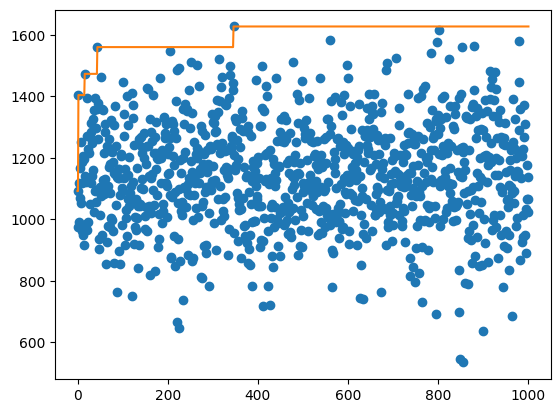

Najlepsze rozwiązanie: [ True False False False False  True  True  True  True  True  True  True
  True False False  True  True  True  True  True False False  True  True
 False  True False  True False  True  True  True  True False False False
 False False  True  True  True  True False False False  True  True False
 False  True]
Przedmioty: [ 0  5  6  7  8  9 10 11 12 15 16 17 18 19 22 23 25 27 29 30 31 32 38 39
 40 41 45 46 49]
Suma wag: 1115
Suma wartosci: 1627


In [12]:
sol_random_search = search_random(w, v, W, 1000)

print('Najlepsze rozwiązanie:',sol_random_search[0])
print('Przedmioty:',np.arange(num)[sol_random_search[0]])
print('Suma wag:', sol_random_search[1])
print('Suma wartosci:', sol_random_search[2])

## Greedy search - procedura optymalizacji zachłannej

Problemem w powyższym podejściu jest fakt, że kolejne rozwiązania nie korzystają z uzyskanej już wiedzy o najlepszych do tej pory rozwiązaniach. Zatem inna prosta heurytyka polega na wystartowaniu z losowego rozwiązania, a następnie modyfikowaniu go poprzez losowe dodawanie przedmiotu do plecaka. Jeśli zmiana (po ewentualnej naprawie) wprowadza poprawę, pozostajemy przy takim rozwiązaniu, jeśli następuje pogorszenie, odrzucamy takie rozwiązanie i ponawiamy próbę.

Taka procedura jest przykładem optymalizacji zachłannej.

In [13]:
def search_greedy_improvement(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        #set random 0 bit to 1
        indx = np.random.randint(num)
        while sol[indx%num] == True:
            indx = indx + 1
        sol[indx%num] = True
        #correct if needed
        if w[sol].sum() > W:
            correct_solution(w,v,W,sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.figure()
    plt.plot(v_all)
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best

__Przykładowe uruchomienie:__

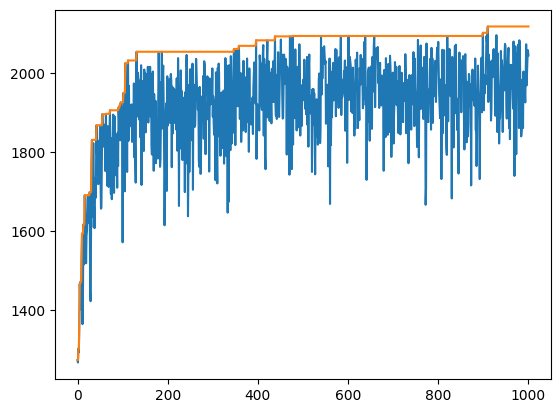

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True False False  True False  True  True False False  True
 False False  True  True False  True  True False  True False  True False
 False False False  True  True  True False  True  True  True  True False
  True  True]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 17 19 20 23 26 27 29 30 32 34
 39 40 41 43 44 45 46 48 49]
Suma wag: 1139
Suma wartosci: 2118


In [14]:
sol_greedy = search_greedy_improvement(w,v,W,1000)

print('Najlepsze rozwiązanie:',sol_greedy[0])
print('Przedmioty:',np.arange(num)[sol_greedy[0]])
print('Suma wag:', sol_greedy[1])
print('Suma wartosci:', sol_greedy[2])

## Dwie inne proste heurystyki

### Najpierw najbardziej wartościowe

Jak dobre rozwiązanie dostaniemy, jeśli do plecaka pakować będziemy najpierw najbardziej wartościowe przedmioty (o ile się zmieszczą)? Pomysł ten jest zaimplementowany w poniższej funkcji.

In [15]:
#Pakuje najpierw najbardziej wartościowe przedmioty
def get_value_first(w, v, W):
    ii = np.argsort(-v)
    num = w.shape[0]
    sol = np.repeat(False, num)
    _W = 0
    for i in range(num):
        if _W + w[ii[i]] <= W:
            sol[ii[i]] = True
            _W = _W + w[ii[i]]
    _V = v[sol].sum()
    return sol, _W, _V

__Przykładowe uruchomienie:__

In [16]:
sol_value_first = get_value_first(w, v, W)

print('Najlepsze rozwiązanie:',sol_value_first[0])
print('Przedmioty:',np.arange(num)[sol_value_first[0]])
print('Suma wag:', sol_value_first[1])
print('Suma wartosci:', sol_value_first[2])

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True False  True False False  True False  True  True False False  True
 False  True  True  True False  True  True False  True False  True False
 False False False  True False  True  True  True  True  True  True False
  True  True]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 17 19 20 23 25 26 27 29 30 32 34
 39 41 42 43 44 45 46 48 49]
Suma wag: 1137
Suma wartosci: 2161


### Najpierw te o najlepszym stosunku wartości do wagi

Inny pomysł to pakowanie najpierw przedmiotów o najlepszym stosunku wartości do wagi.

In [17]:
def get_ratio_first(w, v, W):
    ii = np.argsort(-v/w) #stosunek wartosci do wagi
    num = w.shape[0]
    sol = np.repeat(False, num)
    _W = 0
    for i in range(num):
        if _W + w[ii[i]] <= W:
            sol[ii[i]] = True
            _W = _W + w[ii[i]]
    _V = v[sol].sum()
    return sol, _W, _V

__Przykładowe uruchomienie:__

In [18]:
sol_ratio_first = get_ratio_first(w, v, W)

print('Najlepsze rozwiązanie:',sol_ratio_first[0])
print('Przedmioty:',np.arange(num)[sol_ratio_first[0]])
print('Suma wag:', sol_ratio_first[1])
print('Suma wartosci:', sol_ratio_first[2])

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True False  True False False  True False  True  True False False  True
 False  True  True  True False  True  True False  True False  True False
 False False False  True  True  True  True False  True  True  True False
  True  True]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 17 19 20 23 25 26 27 29 30 32 34
 39 40 41 42 44 45 46 48 49]
Suma wag: 1119
Suma wartosci: 2153


## Zadanie 2

Opracowane być mogą inne procedury naprawcze. Przykładowo, dla rozwiązania niedopuszczalengo, zamiast zmieniać losowe bity True na False, jak w funkcji `correct_solution`, można usuwać najpierw te przedmioty, które mają najgorszy stosunek wartości do wagi. Zaimplementuj taką procedurę.

Porównaj jej działanie z funkcją `correct_solution` w metodach RandomSearch oraz GreedySearch. Przedstaw uśrednione wyniki (co najmniej 10 uruchomień) i wnioski.

TWÓJ PROGRAM:

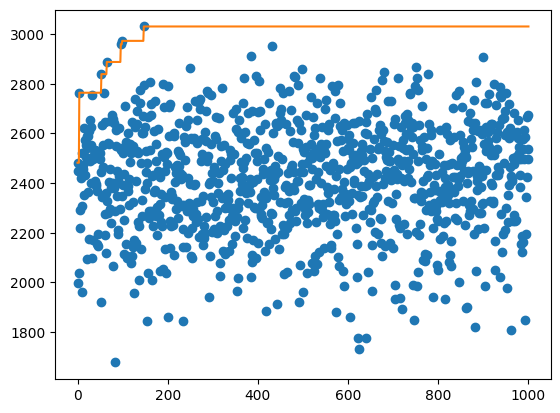

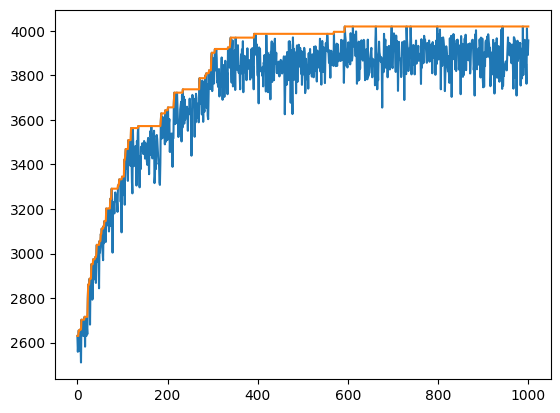

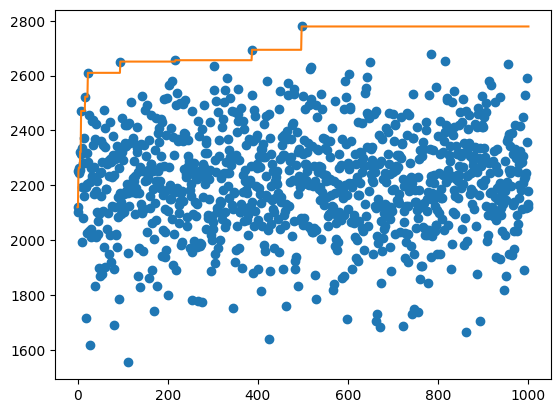

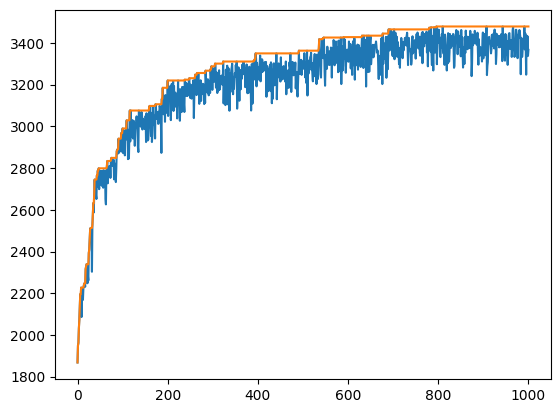

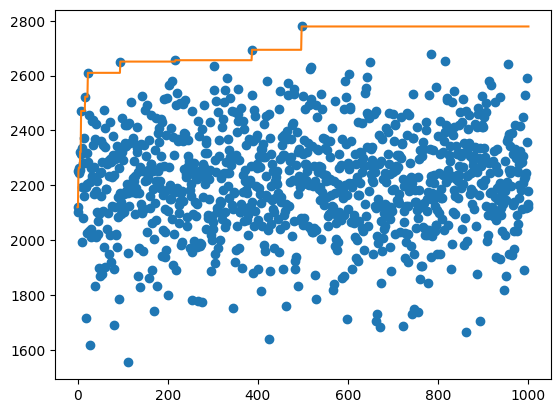

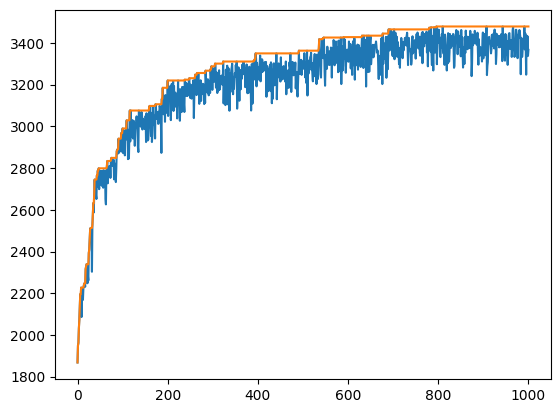

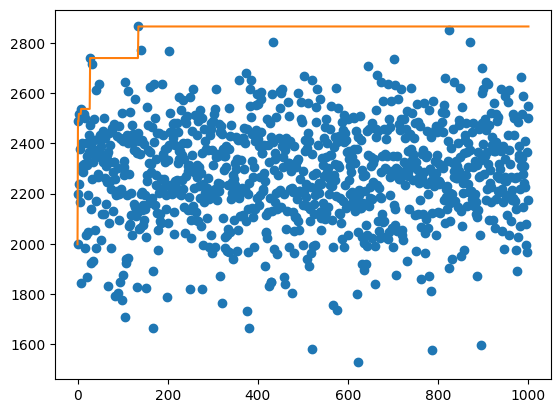

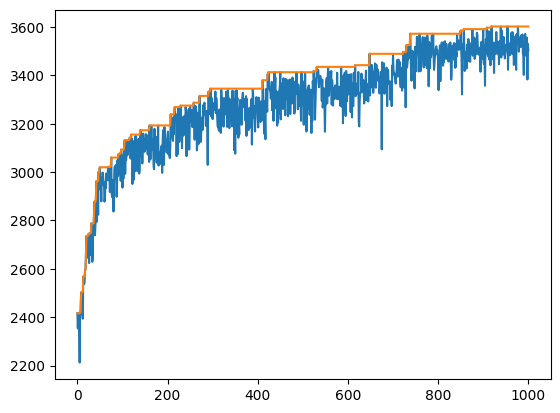

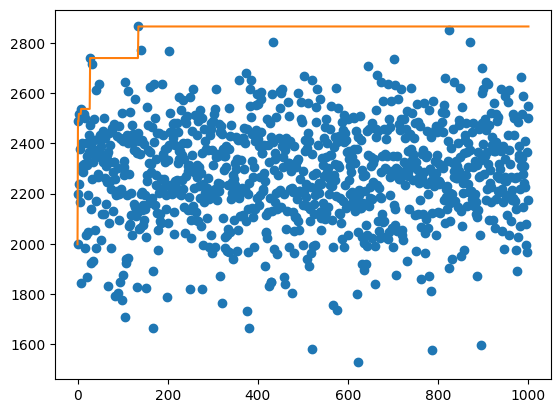

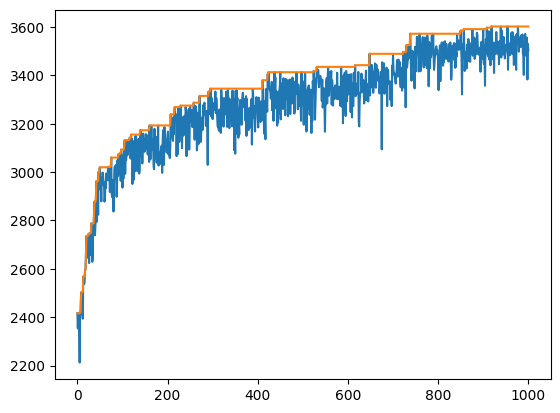

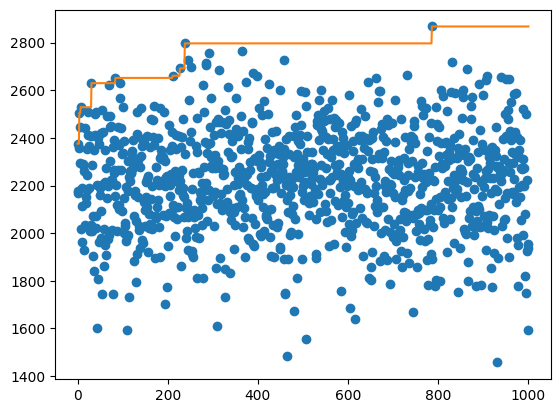

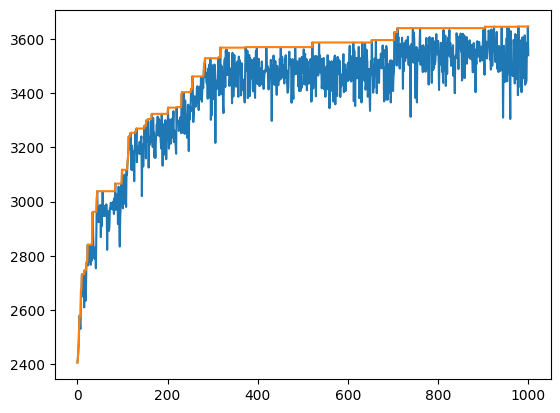

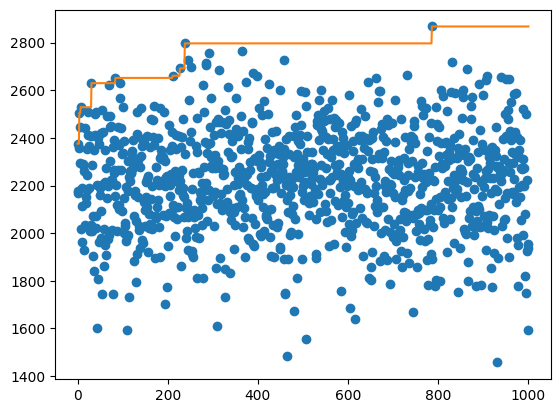

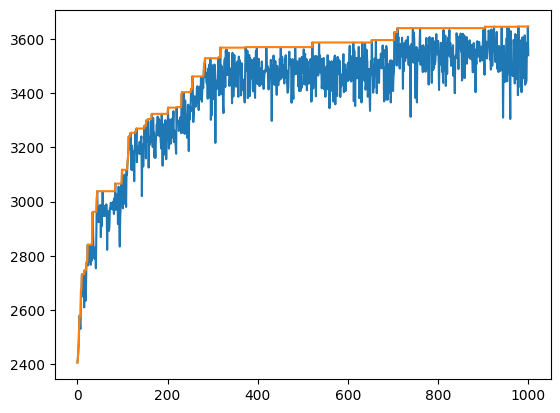

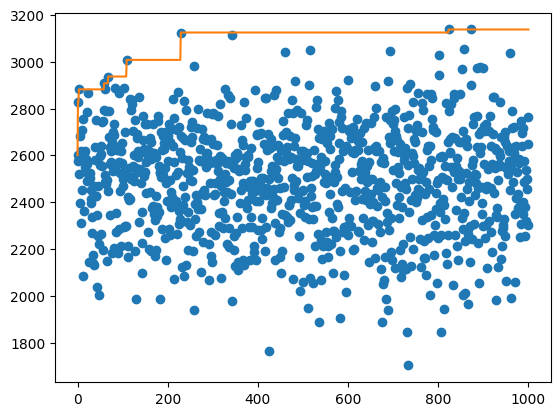

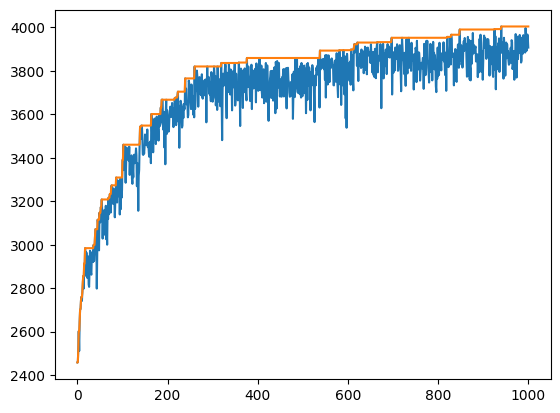

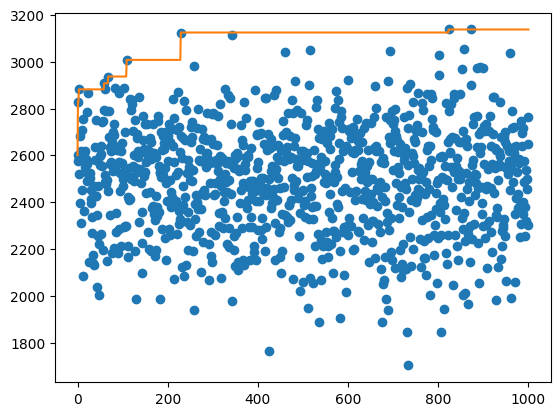

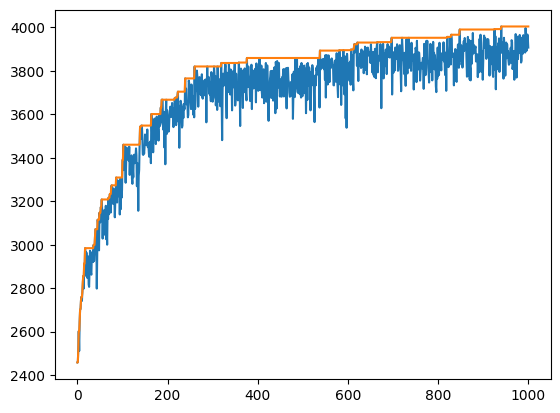

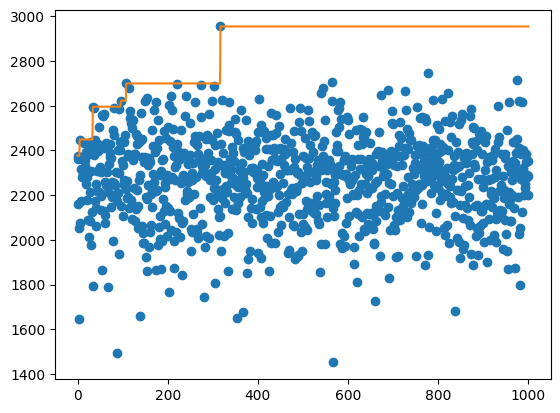

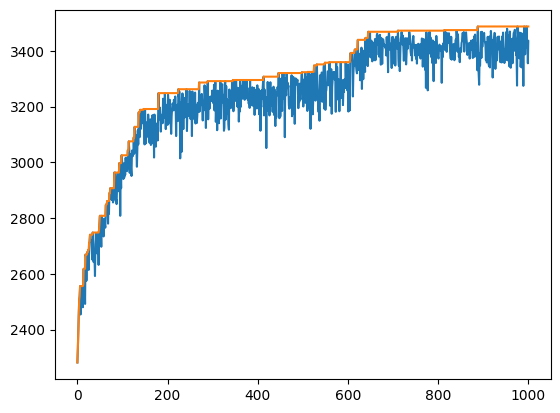

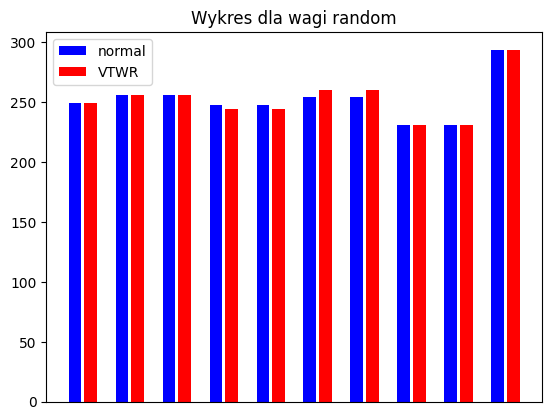

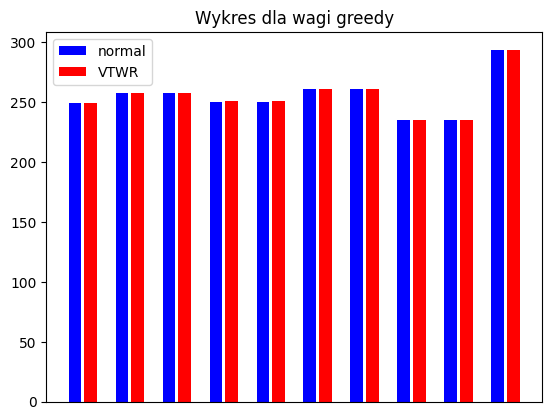

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time

def correct_solutionVTWR(w, v, W, sol):
    num = w.shape[0]
    ii = np.argsort(-v/w)[::-1]
    i = 0
    while w[sol].sum() > W:
        sol[ii[i]] = False
        i += 1

def get_random_solutionVTWR(w, v, W):
    num = w.shape[0]
    sol = np.random.randint(0, 2, size=num, dtype=bool)
    while w[sol].sum() > W:
        correct_solutionVTWR(w, v, W, sol)
    return sol, w[sol].sum(), v[sol].sum()

def search_randomVTWR(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solutionVTWR(w, v, W)
    v_all = [best_V]
    v_best = [best_V]
    for i in range(iters):
        sol, _W, _V = get_random_solutionVTWR(w, v, W)
        if best_V < _V:
            best_sol, best_W, best_V = sol, _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    return best_sol, best_W, best_V, v_all, v_best

def search_greedy_improvementVTWR(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solutionVTWR(w, v, W)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        indx = np.random.randint(num)
        while sol[indx % num] == True:
            indx = indx + 1
        sol[indx % num] = True
        if w[sol].sum() > W:
            correct_solutionVTWR(w, v, W, sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    return best_sol, best_W, best_V, v_all, v_best

def generate_problem(wmin, wmax, vmin, vmax, num):
    return np.random.randint(wmin, wmax, size=num), np.random.randint(vmin, vmax, size=num)

wmin, wmax, vmin, vmax, num = 1, 10, 1, 100, 100
knapsack_perc = 0.5

random_normal_res, random_vtwr_res, greedy_normal_res, greedy_vtwr_res = [], [], [], []

for i in range(10):
    np.random.seed(int(time.time()))
    w, v = generate_problem(wmin, wmax, vmin, vmax, num)  # w - wagi, v - wartosci
    Wall = w.sum()
    Vall = v.sum()
    W = int(knapsack_perc * Wall)
    random_normal_res.append(search_random(w, v, W, 1000))
    random_vtwr_res.append(search_randomVTWR(w, v, W, 1000))
    greedy_normal_res.append(search_greedy_improvement(w, v, W, 1000))
    greedy_vtwr_res.append(search_greedy_improvementVTWR(w, v, W, 1000))

def plot_results(res1, res2, title):
    plt.figure()
    j = 0
    for i in range(10):
        plt.bar(j, res1[i][1], color='b')
        j += 1
        plt.bar(j, res2[i][1], color='r')
        j += 2
    plt.bar(0, 0, color='b', label='normal')
    plt.bar(0, 0, color='r', label='VTWR')
    plt.legend()
    plt.title(title)
    plt.xticks([])

plot_results(random_normal_res, random_vtwr_res, 'Wykres dla wagi random')
plot_results(greedy_normal_res, greedy_vtwr_res, 'Wykres dla wagi greedy')

plt.show()

TWOJE WYNIKI i WNIOSKI:

## Zadanie 3

Dostosuj swoją implementację algorytmu genetycznego do problemu plecakowego.

- Jakie wyniki można uzyskać z jego pomocą? Czy działa on zawsze lepiej niż inne heurystyki?

- Która procedura naprawcza działa lepiej w algorytmie genetycznym?

- Przedstaw wnioski na podstawie uśrednionych wyników dla problemów plecakowych o rozmiarze 50, 100, 300.

- Problemy plecakowe i najlepsze znalezione rozwiązania zapisz do plików.

UWAGA! Po wygenerowaniu problemu plecakowego, przed uruchomieniem algorytmu genetycznego (lub innego) wywołaj:

`np.random.seed(int(time.time()))`

tak by problem plecakowy generował się ten sam, ale algorytmy miały szansę na nowy przebieg.

TWÓJ PROGRAM:

Problem size: 50
Repair function: correct_solutionVTWR
Initial best: 1915


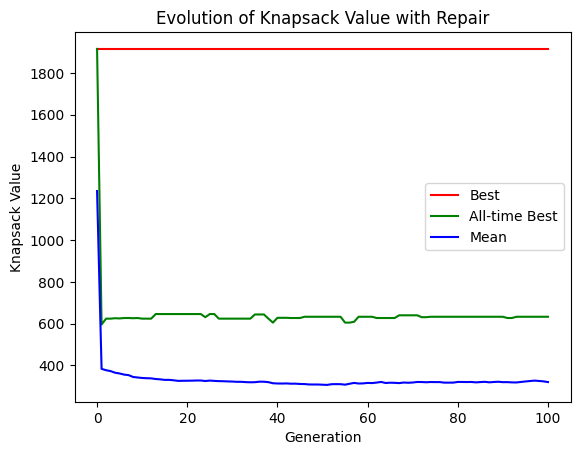

Repair function: correct_solutionRandom
Initial best: 1661


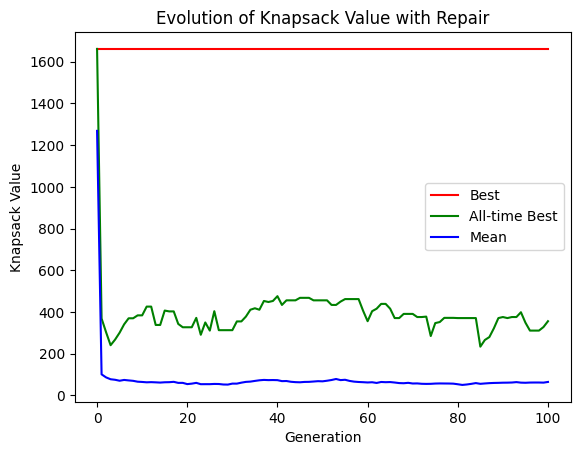

Problem size: 100
Repair function: correct_solutionVTWR
Initial best: 3236


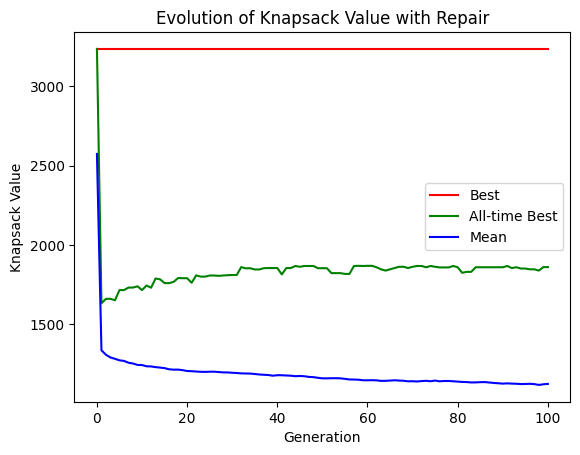

Repair function: correct_solutionRandom
Initial best: 3524


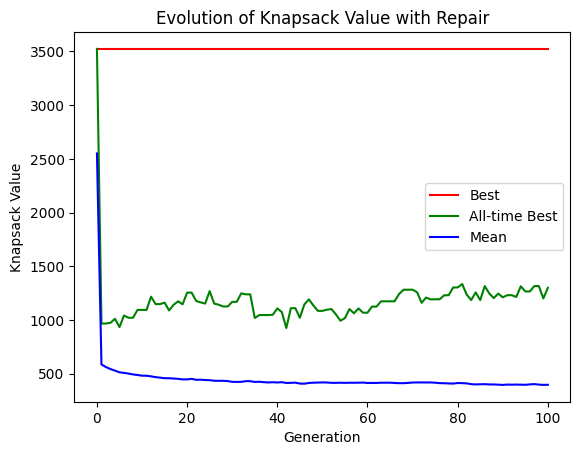

Problem size: 300
Repair function: correct_solutionVTWR
Initial best: 9024


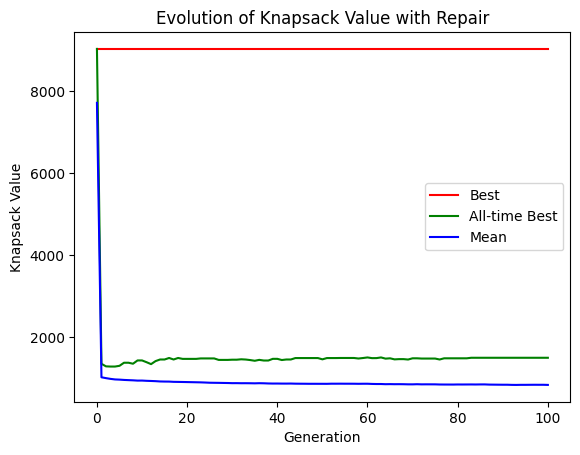

Repair function: correct_solutionRandom
Initial best: 9197


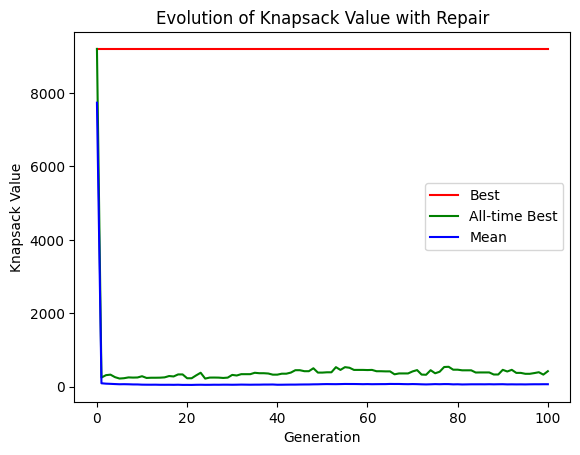

In [21]:
import time

def gen_pop(w, v, W, pop_size):
    # Generowanie losowej populacji rozwiązań
    num_items = len(w)
    pop = np.random.randint(2, size=(pop_size, num_items), dtype=bool)
    return pop

def evaluate(pop, v):
    # Obliczanie wartości każdego rozwiązania w populacji
    return np.dot(pop, v)

def select(pop, evals):
    # Selekcja populacji na podstawie wartości
    selected_indices = np.argsort(-evals)[:len(pop)]
    return pop[selected_indices]

def xover(pop, p, w, v, W):
    # Krzyżowanie populacji z prawdopodobieństwem p
    num_items = len(w)
    new_pop = []
    for i in range(len(pop) // 2):
        parent1, parent2 = pop[2*i], pop[2*i + 1]
        if np.random.rand() < p:
            crossover_point = np.random.randint(1, num_items)
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            new_pop.extend([child1, child2])
        else:
            new_pop.extend([parent1, parent2])
    return np.array(new_pop)

def mutate(pop, p, w, v, W):
    # Mutacja populacji z prawdopodobieństwem p
    num_items = len(w)
    for i in range(len(pop)):
        if np.random.rand() < p:
            mutation_point = np.random.randint(num_items)
            pop[i, mutation_point] = not pop[i, mutation_point]
    return pop

def evolve_knapsack(w, v, W, pop_size, pxover, pmutate, generations):
    pop = gen_pop(w,v,W, pop_size)
    evals = evaluate(pop, v)
    i = np.argmax(evals)
    best = pop[i].copy()
    best_V = evals[i]
    best_iter = 0
    v_all = [best_V]
    v_best = [best_V]
    v_mean = [np.mean(evals)]

    print('initial best', best_V)

    for i in range(generations):
        pop = select(pop, evals)
        pop = xover(pop, pxover, w,v,W)
        pop = mutate(pop, pmutate, w,v,W)
        evals = evaluate(pop, v)
        ii = np.argmax(evals)
        temp_best_v = evals[ii]
        if temp_best_v > best_V:
            best_V = temp_best_v
            best_iter = i+1
            best = pop[ii].copy()
            print('better solution of ', best_V, 'in', best_iter)
        v_all.append(temp_best_v)
        v_best.append(best_V)
        v_mean.append(np.mean(evals))

    plt.plot(v_best, 'r')
    plt.plot(v_all, 'g')
    plt.plot(v_mean, 'b')
    plt.show()
    return best, w[best].sum(), best_V

def correct_solutionVTWR(w, v, W, sol):
    # Procedura naprawcza VTWR
    ii = np.argsort(-v/w)[::-1]
    i = 0
    while w[sol].sum() > W:
        sol[ii[i]] = False
        i += 1

def correct_solutionRandom(w, v, W, sol):
    # Procedura naprawcza losowa
    while w[sol].sum() > W:
        index = np.random.randint(len(sol))
        sol[index] = False

def evolve_knapsack_with_repair(w, v, W, pop_size, pxover, pmutate, generations, repair_fn):
    # Algorytm genetyczny z wybraną procedurą naprawczą
    np.random.seed(int(time.time()))
    pop = gen_pop(w, v, W, pop_size)
    evals = evaluate(pop, v)
    best = pop[np.argmax(evals)].copy()
    best_V = np.max(evals)
    best_iter = 0
    v_all = [best_V]
    v_best = [best_V]
    v_mean = [np.mean(evals)]

    print('Initial best:', best_V)

    for i in range(generations):
        pop = select(pop, evals)
        pop = xover(pop, pxover, w, v, W)
        pop = mutate(pop, pmutate, w, v, W)
        for j in range(len(pop)):
            repair_fn(w, v, W, pop[j])
        evals = evaluate(pop, v)
        temp_best_v = np.max(evals)
        if temp_best_v > best_V:
            best_V = temp_best_v
            best_iter = i + 1
            best = pop[np.argmax(evals)].copy()
            print('Better solution of', best_V, 'found in generation', best_iter)
        v_all.append(temp_best_v)
        v_best.append(best_V)
        v_mean.append(np.mean(evals))

    plt.plot(v_best, 'r', label='Best')
    plt.plot(v_all, 'g', label='All-time Best')
    plt.plot(v_mean, 'b', label='Mean')
    plt.legend()
    plt.xlabel('Generation')
    plt.ylabel('Knapsack Value')
    plt.title('Evolution of Knapsack Value with Repair')
    plt.show()

    return best, w[best].sum(), best_V

# Definiujemy problemy plecakowe
def generate_knapsack_problem(num_items):
    w = np.random.randint(1, 100, size=num_items)
    v = np.random.randint(1, 100, size=num_items)
    W = np.random.randint(100, 1000)
    return w, v, W

# Uruchamiamy algorytm genetyczny z różnymi procedurami naprawczymi dla różnych problemów plecakowych
pop_size = 100
pxover = 0.8
pmutate = 0.1
generations = 100
repair_functions = [correct_solutionVTWR, correct_solutionRandom]

for num_items in [50, 100, 300]:
    w, v, W = generate_knapsack_problem(num_items)
    print('Problem size:', num_items)
    for repair_fn in repair_functions:
        print('Repair function:', repair_fn.__name__)
        evolve_knapsack_with_repair(w, v, W, pop_size, pxover, pmutate, generations, repair_fn)


TWOJE WYNIKI i WNIOSKI:

&copy; Katedra Informatyki, Politechnika Krakowska